In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
df = pd.read_csv("StudentsPerformance.csv")

In [53]:
df['average_score'] = (df["math score"] +df["reading score"]+df["writing score"])/3

In [54]:
df['average_score'] = (df['math score'] + df['reading score'] + df['writing score']) / 3
df['pass'] = df.apply(lambda row: 1 if (row['math score'] >= 40 and 
                                        row['reading score'] >= 40 and 
                                        row['writing score'] >= 40) else 0, axis=1)

In [55]:
print(df.shape)

(1000, 10)


In [56]:
df["test preparation course"].unique()

array(['none', 'completed'], dtype=object)

In [57]:
df["pass"].value_counts(normalize=True) * 100

pass
1    94.9
0     5.1
Name: proportion, dtype: float64

In [58]:
df["gender"] = df["gender"].map({"female" : 0 , "male" : 1})

In [59]:
df["test preparation course"] = df["test preparation course"].map({"none" : 0 , "completed" : 1})

In [60]:
df = df.drop('average_score', axis=1)

In [61]:
df = pd.get_dummies(df, drop_first=True)

In [62]:
df.head()

,gender,test preparation course,math score,reading score,writing score,pass,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_standard
0,0,0,72,72,74,1,True,False,False,False,True,False,False,False,False,True
1,0,1,69,90,88,1,False,True,False,False,False,False,False,True,False,True
2,0,0,90,95,93,1,True,False,False,False,False,False,True,False,False,True
3,1,0,47,57,44,1,False,False,False,False,False,False,False,False,False,False
4,1,0,76,78,75,1,False,True,False,False,False,False,False,True,False,True


In [63]:
X = df.drop('pass', axis=1)
y = df['pass']

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Model training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 3. Predict
y_pred = model.predict(X_test)

# 4. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.985
Confusion Matrix:
 [[ 11   2]
 [  1 186]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88        13
           1       0.99      0.99      0.99       187

    accuracy                           0.98       200
   macro avg       0.95      0.92      0.94       200
weighted avg       0.98      0.98      0.98       200



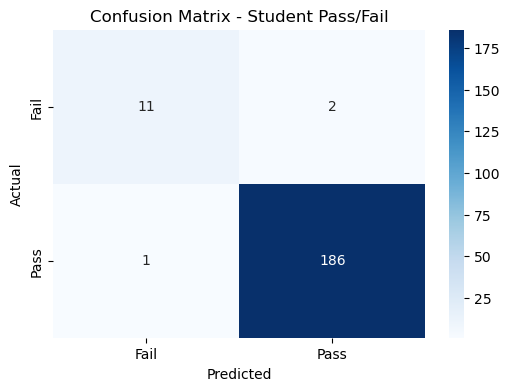

In [66]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fail', 'Pass'], yticklabels=['Fail', 'Pass'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Student Pass/Fail')
plt.show()